# House Price Prediction (Coursera Project)

In [2]:
# understand problem
# load Data
# data preparation
# model development and evaluation
# deployment and feedback

# LOADING DATA

In [3]:
import pandas as pd 
df = pd.read_csv("kc_house_data.csv")    # get same csv by url and path

df.head(6)

# column headers present
# date, id will be removed
# normalization needed of sqft columns??

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


# DATA PREPARATION

In [4]:
df.dtypes

# no need to change data types

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.info()

# no need to remove missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# column removal

df = df.drop(["id","date"],axis=1)

# EXPLORATORY ANALYSIS

In [7]:
# what is affecting price the most
df.corr()["price"].sort_values()

# sqft_living affects price most
# features having corelation less than 0.2 can be ignored

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [19]:
# how floors affect price:

# how many floors in each house
floors_in_each = df["floors"].value_counts()
print(type(floors_in_each))
df_floors = floors_in_each.to_frame().reset_index().rename(columns={"index": "floors", "floors": "number of houses"})

# mean price of each unique floor
df_floor_value = df[["floors","price"]]
df_grp = df_floor_value.groupby(["floors"],as_index=False).mean(numeric_only=True)

merged_df = pd.merge(df_floors, df_grp, on="floors", how="inner")
merged_df["price"] = merged_df["price"].apply(lambda x: "%.0f" % x)
merged_df

# we see that more floors generally results in higher price
# trend not followed in the 8 houses with 3.5 floors

<class 'pandas.core.series.Series'>


,floors,number of houses,price
0,1.0,10680,442181
1,2.0,8241,648891
2,1.5,1910,558981
3,3.0,613,582526
4,2.5,161,1060346
5,3.5,8,933312


In [9]:
# lets view those 8 houses where price not as high as expected despite more floors
req_df = df[df["floors"] == 3.5]
req_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
10077,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
18477,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
20308,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


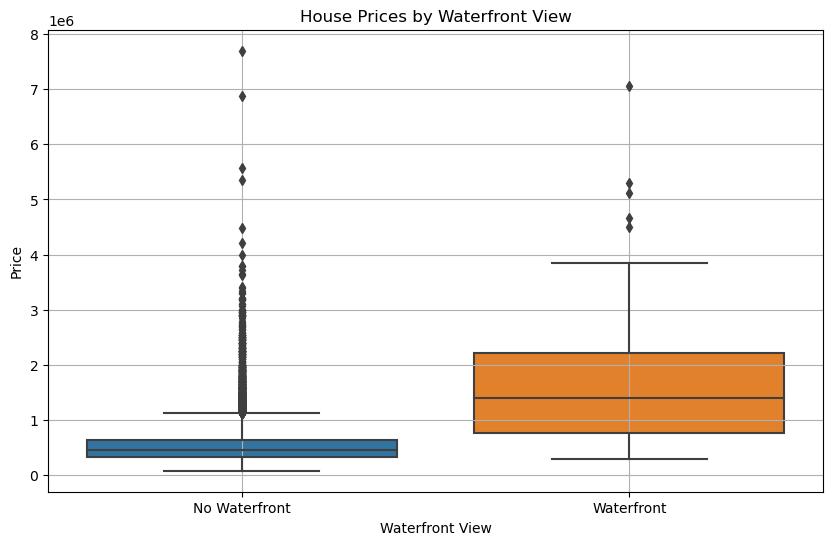

In [10]:
# comparing waterfront effect on price
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('House Prices by Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.xticks([0, 1], ['No Waterfront', 'Waterfront'])
plt.grid(True)
plt.show()

# on average waterfront has higher prices but indidual cases of without water front can exceed price of with waterfront

<Axes: xlabel='sqft_above', ylabel='price'>

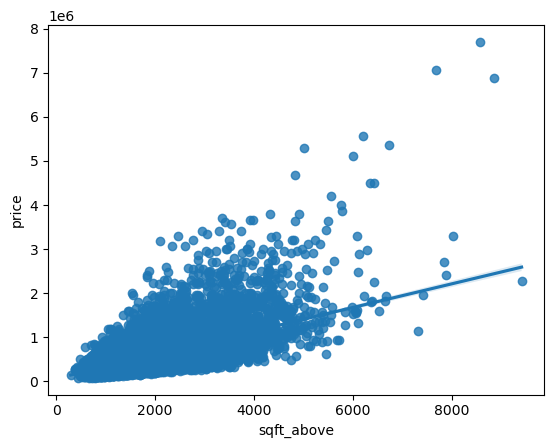

In [11]:
# graphically seeing relation of sqft_above and price using regplot

import seaborn as sns
sns.regplot(x="sqft_above",y="price",data=df)

# MODEL DEVELOPMENT AND EVALUATION

In [56]:
# model 1: multiple linear regression

# predicting price using all features apart from id, date and afterwards using only sqft_living
from sklearn.linear_model import LinearRegression
#import numpy as np

z = df["sqft_living"].values.reshape(-1,1)
v = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
x = df.drop(["price"],axis=1)
y = df["price"]

# train test split
from sklearn.model_selection import train_test_split
z_train, z_test, y2_train, y2_test = train_test_split(z,y,test_size=0.3,random_state=0)
v_train, v_test, y3_train, y3_test = train_test_split(v,y,test_size=0.3,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# define dependent variable/ target and form fit
lm2 = LinearRegression()
lm3 = LinearRegression()
lm = LinearRegression()
lm2.fit(z_train, y2_train)
lm3.fit(v_train, y3_train)
lm.fit(x_train, y_train)

# getting r^2 score
linear_score2 = lm2.score(z_test, y2_test)
linear_score3 = lm3.score(v_test, y3_test)
linear_score_train = lm.score(x_train, y_train)
linear_score_test = lm.score(x_test, y_test)

print(f"R^2 score when using sqft_living only is: {linear_score2}")
print(f"R^2 score when using selected features is: {linear_score3}")
print(f"R^2 score(of trining set) when using all features is: {linear_score_train}")
print(f"R^2 score(of testing set) when using all features is: {linear_score_test}")

# better to use selected features only as using all features doesnot improve R^2 score by much (6% increase)
# 0.6 < R^2 < 0.80 shows strong results (prediction is good) but performance/ prediction can be improved
# also, little difference between R^2 score of training and testing shows no problem of over or under fitting 

R^2 score when using sqft_living only is: 0.48889929019453016
R^2 score when using selected features is: 0.6442095134602707
R^2 score(of trining set) when using all features is: 0.7044808067489785
R^2 score(of testing set) when using all features is: 0.6877902899299327


In [30]:
# model 2: second order polynomial regression

# for polynomial regression better to normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs_train = scaler.fit_transform(x_train)
xs_test = scaler.transform(x_test)

# polynomial transfomation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
xst_train = poly.fit_transform(xs_train)
xst_test = poly.transform(xs_test)
poly.fit(xst_train,y_train)
linear_2 = LinearRegression()
linear_2.fit(xst_train,y_train)

# getting R^2 score for second order polynomial regression
print("R^2 score for training data: ",linear.score(xst_train,y_train))
print("R^2 score for testing data: ",linear.score(xst_test,y_test))

# little difference of R^2 between training and testing set
# shows problem of overfitting or underfitting not happen

# 0.80 < R^2 < 1.00 show prediction very strong. Better results.

R^2 score for training data:  0.8290761947640706
R^2 score for training data:  0.8230362429576461


In [55]:
# model 2: 3th order polynomial regression

# polynomial transfomation
from sklearn.preprocessing import PolynomialFeatures
poly_3 = PolynomialFeatures(degree=3)
xst_3_train = poly_3.fit_transform(xs_train)
xst_3_test = poly_3.transform(xs_test)
linear_3 = LinearRegression()
linear_3.fit(xst_3_train,y_train)

# another way of getting R^2 score
from sklearn.metrics import r2_score
y_pred_3 = linear_3.predict(xst_3_test)
r3 = r2_score(y_test,y_pred_3)

# getting R^2 score for 3th order polynomial regression
print("R^2 score for training data: ",linear_3.score(xst_3_train,y_train))
print("R^2 score for testing data: ",linear_3.score(xst_3_test,y_test))
print("R^2 score for testing data: ",r3)

# huge difference of R^2 between training and testing set
# Best R^2 for training data and worst for testing data shows problem of overfitting

R^2 score for training data:  0.9058600682831395
R^2 score for testing data:  -1.2869438343016056e+16
R^2 score for testing data:  -1.2869438343016056e+16


In [59]:
# ridge regression applied on 3rd order polynomial regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1 = [{"alpha":[0.01,0.1,1]}]     # can also send in other hyperparameters eg normalize true, false. will get R^2 values for all alpha with and without normalizing variables
RR = Ridge()                               # ridge regression object
Grid1 = GridSearchCV(RR,parameters1,cv=4)  # creating folds and and telling to apply rige regression with given alpha values
RR_scaler = StandardScaler()
RR_poly = PolynomialFeatures(degree=3)
RR_xs = RR_scaler.fit_transform(x)
RR_xst = RR_poly.fit_transform(RR_xs)
Grid1.fit(RR_xst,y)                        # sending in data and creating fit
Grid1.best_estimator_                      # finding best lamda/ alpha
scores=Grid1.cv_results_                   # array of R^2 scores and other results
type(scores)
scores["mean_test_score"]                  # mean R^2 score of each lamda

# so lamda = 1 is most optimal shrinkage coefficient
# but since using lamda=1 results in medium R^2 score
# therefore, 3rd order polynomial regression model should be avoided here

array([0.37775806, 0.4236202 , 0.42151448])

In [43]:
# ridge regression applied to 3th order polynomial regression assuming lamda=0.0001

from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

R.fit(xst_3_train,y_train)

y_pred_3R = R.predict(xst_3_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred_3R)

# no improvement of R^2 score for 3rd order polynomial regression using lamda= 0.0001

0.2638406727128296

## Final Remarks:
### In order to predict house prices according to data given, the best model would be 2nd order polynomial regression

# DEPLOYMENT AND FEEDBACK
## Use whole data set to train a second order polynomial regression model and use it to predict house prices in the same county from where data collected